In [160]:
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer

In [161]:
df=pd.read_csv("sample_data.csv")

In [162]:
df

,Unnamed: 0,id_str,text,created_at,polarity,user_location
0,0,1161743655130058753,@ImranKhanPTI please use the trend on both twi...,2019-08-14 20:57:26,0,"Malir Cantonment, Pakistan"
1,1,1161743655713038340,Vic is headed to recovery. Took a bit longer ...,2019-08-14 20:57:26,0,"Walterboro, SC"
2,2,1161743656056844288,RT @w_terrence: I never experienced racism &am...,2019-08-14 20:57:26,0,"Tennessee, USA"
3,3,1161743656627396609,Come see me tonight! https://t.co/BkR0sd5dol,2019-08-14 20:57:26,0,Texas
4,4,1161743656786767873,"https://t.co/F8fTkbqi5M\nBest place to go,got ...",2019-08-14 20:57:26,1,chattanooga tn
...,...,...,...,...,...,...
2643,2643,1161745628193419265,A photographer tried to post Facebook/Instagra...,2019-08-14 21:05:16,0,"Oakland, CA"
2644,2644,1161745628336132098,Taking a look at Daft and Facebook sites set o...,2019-08-14 21:05:16,0,"Dublin City, Ireland"
2645,2645,1161745629770592256,"Appomattox father looking for kidney donor, ta...",2019-08-14 21:05:16,0,"Roanoke, Virginia"
2646,2646,1161745631829987329,So true ... https://t.co/DRftsgSpKY,2019-08-14 21:05:17,0,NaN


In [163]:
df.drop(columns=['id_str','user_location','created_at','polarity'],inplace=True)

In [164]:
df.shape

(2648, 2)

In [165]:
df.keys()

Index(['Unnamed: 0', 'text'], dtype='object')

In [166]:
df.describe()

,Unnamed: 0
count,2648.00000
mean,1323.50000
std,764.55608
min,0.00000
25%,661.75000
50%,1323.50000
75%,1985.25000
max,2647.00000


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2648 non-null   int64 
 1   text        2648 non-null   object
dtypes: int64(1), object(1)
memory usage: 41.5+ KB


In [168]:
df.isnull().sum()

Unnamed: 0    0
text          0
dtype: int64

In [169]:
import nltk
import spacy
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [170]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation (but keep # and @)
    text = re.sub(r'[^\w\s#@]', '', text)
    
    # Remove special characters except # and @
    text = re.sub(r'[^\w\s#@]', '', text)
    
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Rejoin the filtered tokens
    text = ' '.join(filtered_tokens)
    
    return text

# Apply the cleaning function to the DataFrame
df['cleaned_text'] = df['text'].apply(clean_text)  # replace 'text_column' with the name of your text column

# Display the cleaned text
print(df[['text', 'cleaned_text']].head())

                                                text  \
0  @ImranKhanPTI please use the trend on both twi...   
1  Vic is headed to recovery.  Took a bit longer ...   
2  RT @w_terrence: I never experienced racism &am...   
3      Come see me tonight!  https://t.co/BkR0sd5dol   
4  https://t.co/F8fTkbqi5M\nBest place to go,got ...   

                                        cleaned_text  
0  @imrankhanpti please use trend twiter facebook...  
1  vic headed recovery took bit longer accumulate...  
2  rt @w_terrence never experienced racism amp ha...  
3                                   come see tonight  
4  best place gogot appt tomorrow see donna pears...  


In [171]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
2643    False
2644    False
2645    False
2646    False
2647    False
Length: 2648, dtype: bool

In [172]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [173]:
df['text'] = df['cleaned_text'].apply(lambda x: stemming(x))


In [174]:
df

,Unnamed: 0,text,cleaned_text
0,0,@imrankhanpti please use trend twiter facebook...,@imrankhanpti please use trend twiter facebook...
1,1,vic headed recovery took bit longer accumulate...,vic headed recovery took bit longer accumulate...
2,2,rt @w_terrence never experienced racism amp ha...,rt @w_terrence never experienced racism amp ha...
3,3,come see tonight,come see tonight
4,4,best place gogot appt tomorrow see donna pears...,best place gogot appt tomorrow see donna pears...
...,...,...,...
2643,2643,photographer tried post facebookinstagram ads ...,photographer tried post facebookinstagram ads ...
2644,2644,taking look daft facebook sites set people adv...,taking look daft facebook sites set people adv...
2645,2645,appomattox father looking kidney donor takes f...,appomattox father looking kidney donor takes f...
2646,2646,true,true


In [175]:
df.head()


,Unnamed: 0,text,cleaned_text
0,0,@imrankhanpti please use trend twiter facebook...,@imrankhanpti please use trend twiter facebook...
1,1,vic headed recovery took bit longer accumulate...,vic headed recovery took bit longer accumulate...
2,2,rt @w_terrence never experienced racism amp ha...,rt @w_terrence never experienced racism amp ha...
3,3,come see tonight,come see tonight
4,4,best place gogot appt tomorrow see donna pears...,best place gogot appt tomorrow see donna pears...


In [176]:
def polarity(text):
    return TextBlob(text).sentiment.polarity


In [177]:
df['polarity'] = df['cleaned_text'].apply(polarity)


In [178]:
df

,Unnamed: 0,text,cleaned_text,polarity
0,0,@imrankhanpti please use trend twiter facebook...,@imrankhanpti please use trend twiter facebook...,0.000000
1,1,vic headed recovery took bit longer accumulate...,vic headed recovery took bit longer accumulate...,0.000000
2,2,rt @w_terrence never experienced racism amp ha...,rt @w_terrence never experienced racism amp ha...,-0.050000
3,3,come see tonight,come see tonight,0.000000
4,4,best place gogot appt tomorrow see donna pears...,best place gogot appt tomorrow see donna pears...,0.566667
...,...,...,...,...
2643,2643,photographer tried post facebookinstagram ads ...,photographer tried post facebookinstagram ads ...,-0.025000
2644,2644,taking look daft facebook sites set people adv...,taking look daft facebook sites set people adv...,0.000000
2645,2645,appomattox father looking kidney donor takes f...,appomattox father looking kidney donor takes f...,0.000000
2646,2646,true,true,0.350000


In [179]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [180]:
df['sentiment'] = df['polarity'].apply(sentiment)


In [181]:
df

,Unnamed: 0,text,cleaned_text,polarity,sentiment
0,0,@imrankhanpti please use trend twiter facebook...,@imrankhanpti please use trend twiter facebook...,0.000000,Neutral
1,1,vic headed recovery took bit longer accumulate...,vic headed recovery took bit longer accumulate...,0.000000,Neutral
2,2,rt @w_terrence never experienced racism amp ha...,rt @w_terrence never experienced racism amp ha...,-0.050000,Negative
3,3,come see tonight,come see tonight,0.000000,Neutral
4,4,best place gogot appt tomorrow see donna pears...,best place gogot appt tomorrow see donna pears...,0.566667,Positive
...,...,...,...,...,...
2643,2643,photographer tried post facebookinstagram ads ...,photographer tried post facebookinstagram ads ...,-0.025000,Negative
2644,2644,taking look daft facebook sites set people adv...,taking look daft facebook sites set people adv...,0.000000,Neutral
2645,2645,appomattox father looking kidney donor takes f...,appomattox father looking kidney donor takes f...,0.000000,Neutral
2646,2646,true,true,0.350000,Positive


In [182]:
df.to_excel('xebia.xlsx', index=False, sheet_name='Sheet1') 

In [183]:
df.to_csv('xebia.csv', index=True)

In [184]:
df

,Unnamed: 0,text,cleaned_text,polarity,sentiment
0,0,@imrankhanpti please use trend twiter facebook...,@imrankhanpti please use trend twiter facebook...,0.000000,Neutral
1,1,vic headed recovery took bit longer accumulate...,vic headed recovery took bit longer accumulate...,0.000000,Neutral
2,2,rt @w_terrence never experienced racism amp ha...,rt @w_terrence never experienced racism amp ha...,-0.050000,Negative
3,3,come see tonight,come see tonight,0.000000,Neutral
4,4,best place gogot appt tomorrow see donna pears...,best place gogot appt tomorrow see donna pears...,0.566667,Positive
...,...,...,...,...,...
2643,2643,photographer tried post facebookinstagram ads ...,photographer tried post facebookinstagram ads ...,-0.025000,Negative
2644,2644,taking look daft facebook sites set people adv...,taking look daft facebook sites set people adv...,0.000000,Neutral
2645,2645,appomattox father looking kidney donor takes f...,appomattox father looking kidney donor takes f...,0.000000,Neutral
2646,2646,true,true,0.350000,Positive


<Axes: xlabel='sentiment', ylabel='count'>

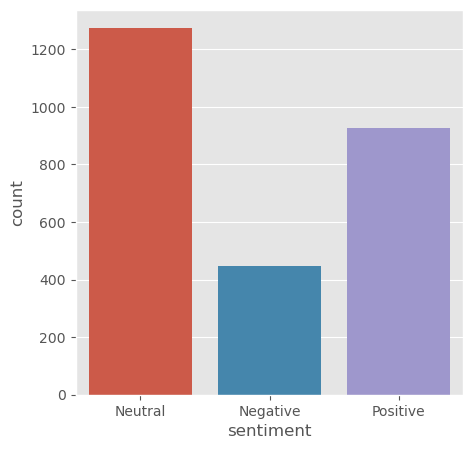

In [185]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

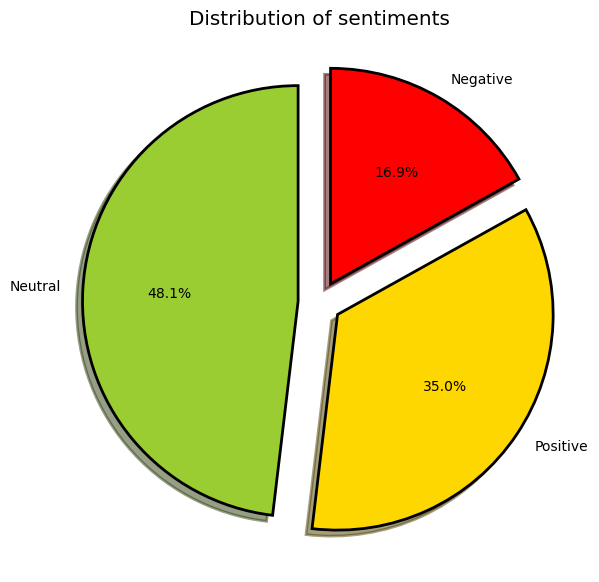

In [186]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')


In [187]:
pos_tweets = df[df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Unnamed: 0,text,cleaned_text,polarity,sentiment
478,478,rt @camaracts dad posted picture facebook call...,rt @camaracts dad posted picture facebook call...,1.0,Positive
175,175,best video internet ever,best video internet ever,1.0,Positive
1618,1618,best salmon steak find,best salmon steak find,1.0,Positive
2231,2231,rt @camaracts dad posted picture facebook call...,rt @camaracts dad posted picture facebook call...,1.0,Positive
547,547,rt @antucder best,rt @antucder best,1.0,Positive


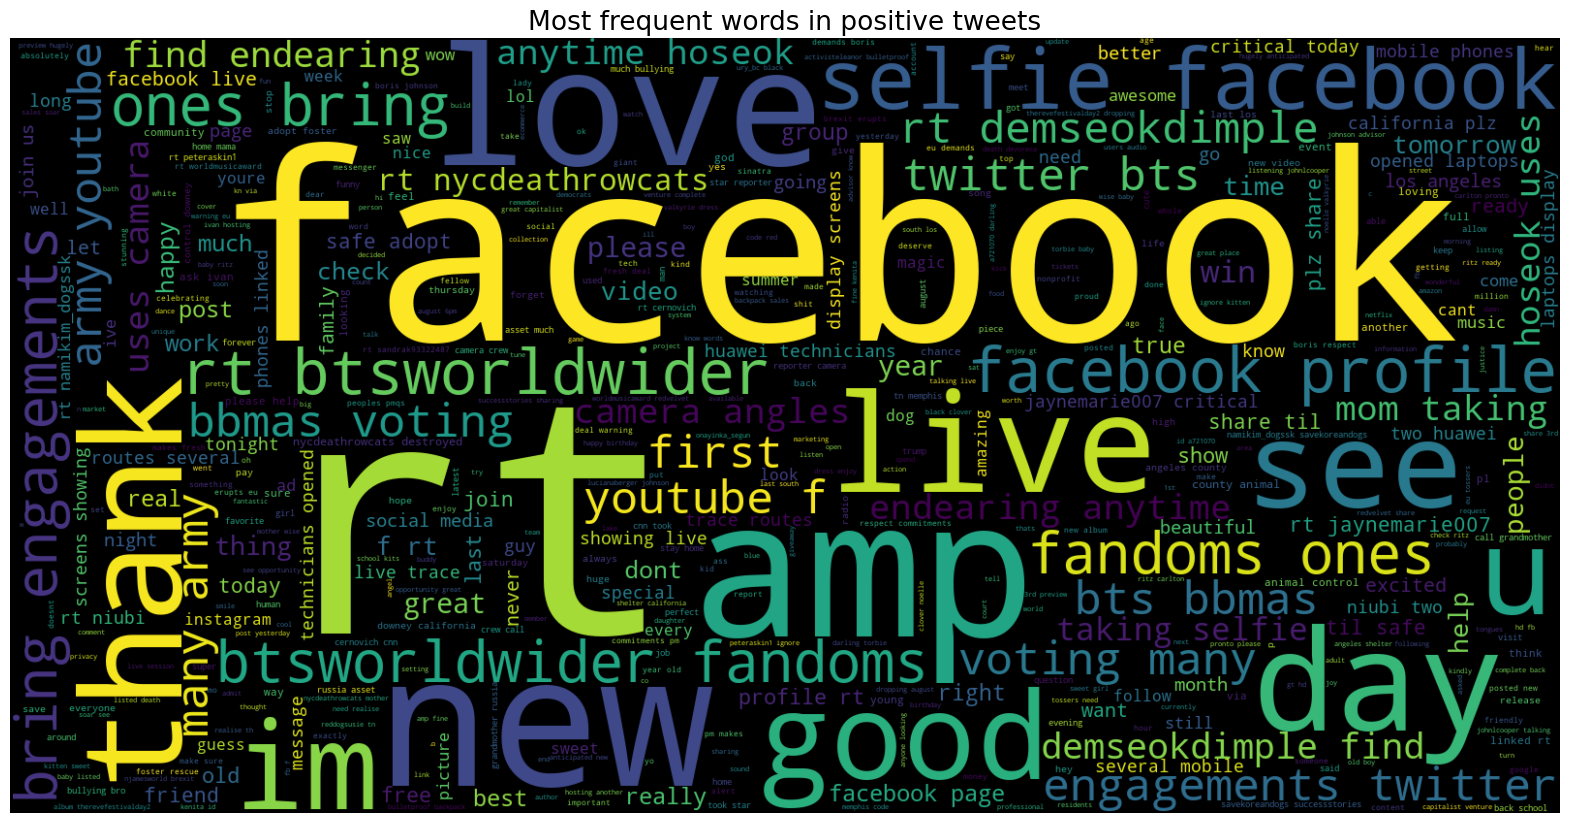

In [188]:
text = ' '.join([word for word in pos_tweets['cleaned_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [189]:
neg_tweets =df[df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Unnamed: 0,text,cleaned_text,polarity,sentiment
1211,1211,rt @nycdeathrowcats lobster roll female orange...,rt @nycdeathrowcats lobster roll female orange...,-0.004167,Negative
1923,1923,@pinkyd124 left facebook long time dont know w...,@pinkyd124 left facebook long time dont know w...,-0.016667,Negative
771,771,history funny sadour inherited tragedy hard co...,history funny sadour inherited tragedy hard co...,-0.020833,Negative
1793,1793,rt @prolifeninja long weve suffered long train...,rt @prolifeninja long weve suffered long train...,-0.022222,Negative
1700,1700,rt @dirkschwenk facebook dark dirk paranoid sp...,rt @dirkschwenk facebook dark dirk paranoid sp...,-0.025000,Negative


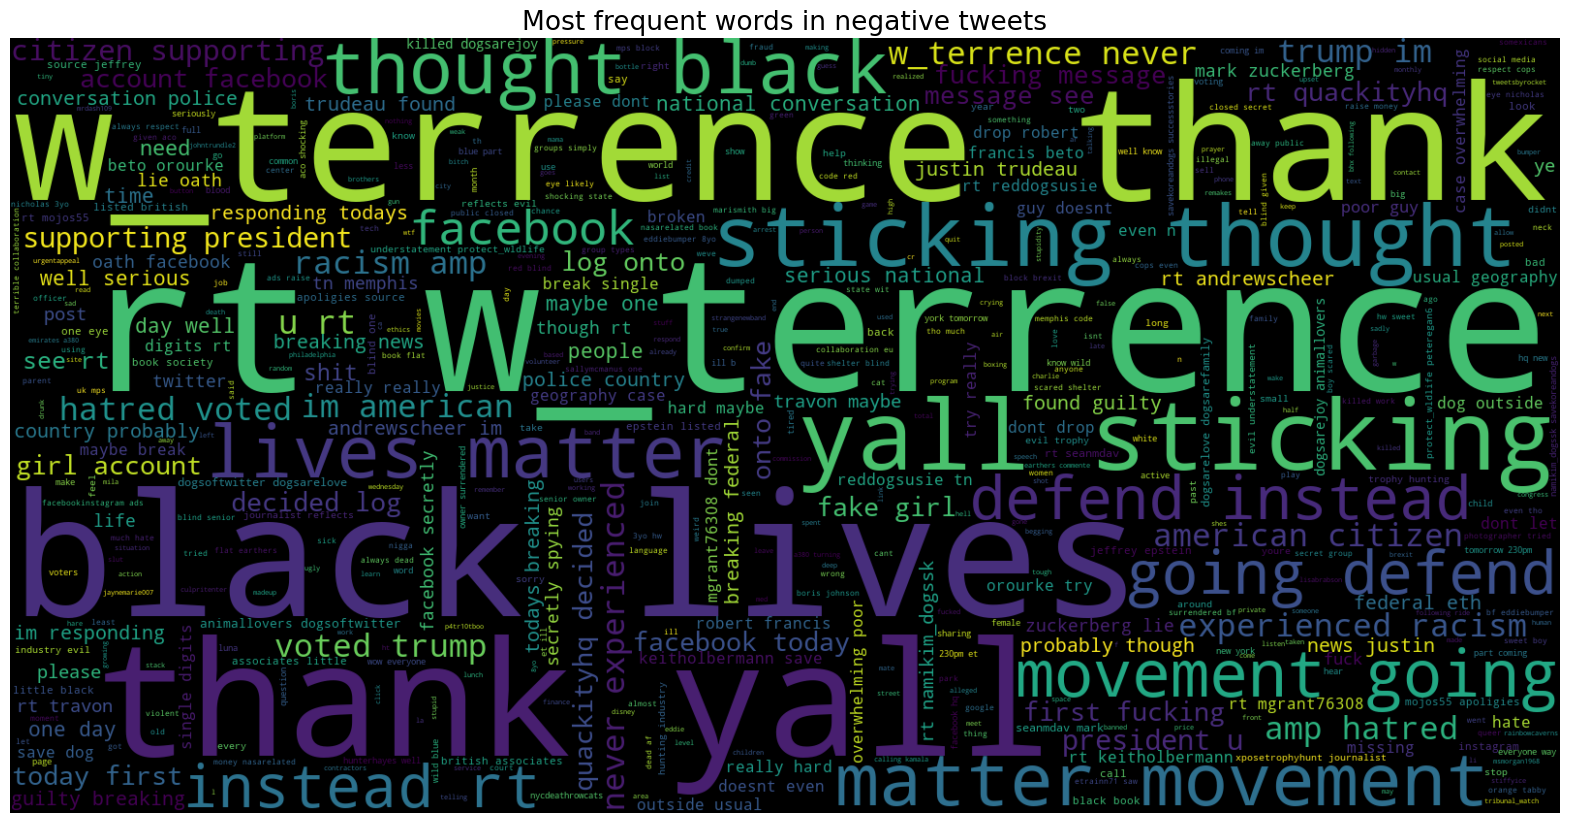

In [190]:
text = ' '.join([word for word in neg_tweets['cleaned_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [191]:
neutral_tweets = df[df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Unnamed: 0,text,cleaned_text,polarity,sentiment
0,0,@imrankhanpti please use trend twiter facebook...,@imrankhanpti please use trend twiter facebook...,0.0,Neutral
1705,1705,@rosabrighid instagram owned facebook,@rosabrighid instagram owned facebook,0.0,Neutral
1722,1722,repentance yes,repentance yes,0.0,Neutral
1719,1719,truth,truth,0.0,Neutral
1718,1718,rt @espn go 50 today via christina weaverfacebook,rt @espn go 50 today via christina weaverfacebook,0.0,Neutral


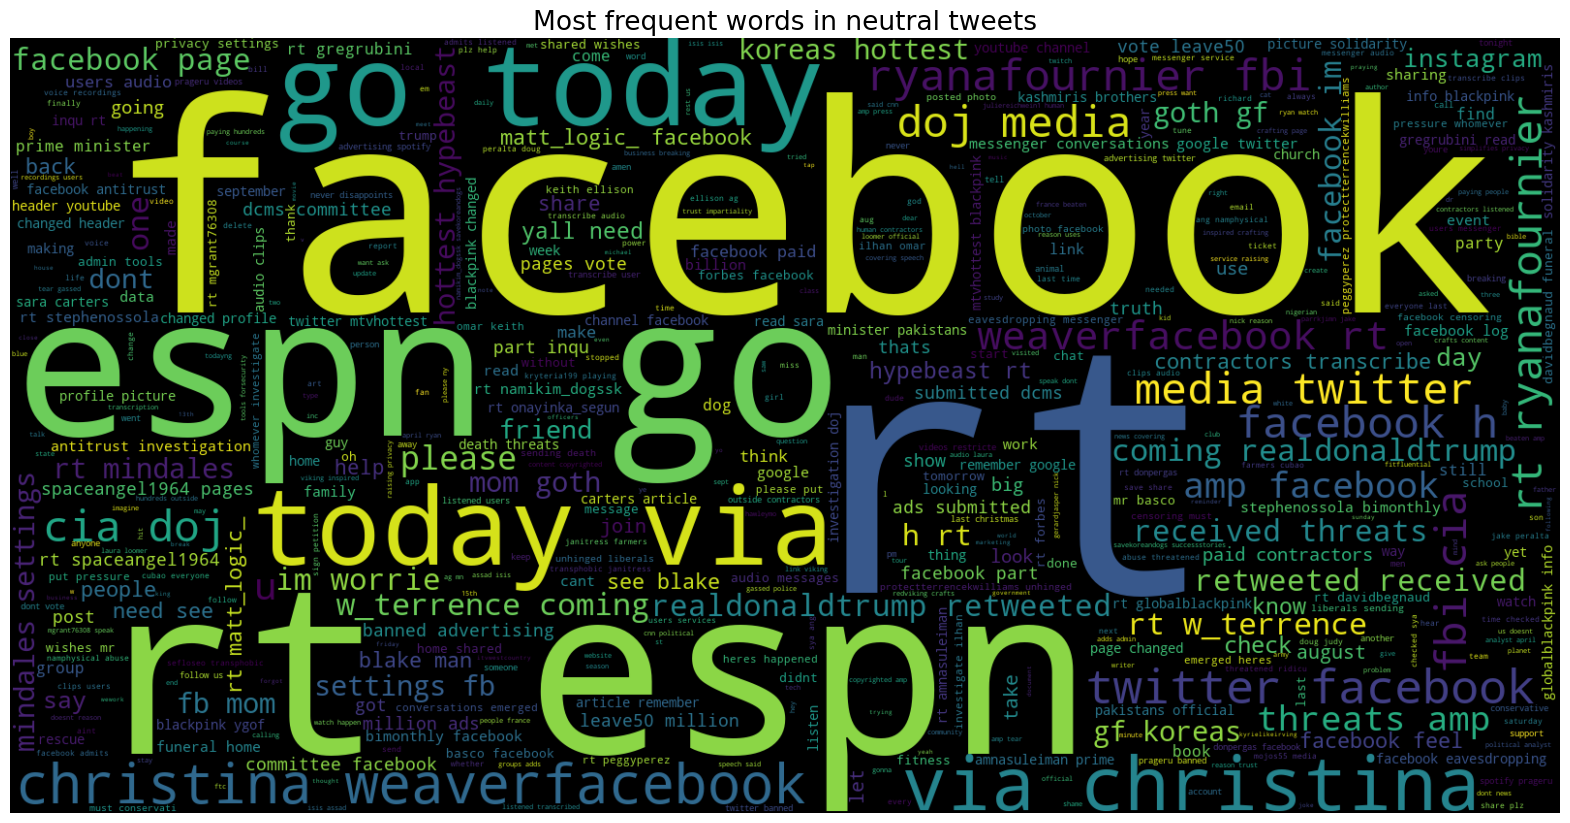

In [192]:
text = ' '.join([word for word in neutral_tweets['cleaned_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [193]:
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(df.cleaned_text)
#x_test=vectorizer.transform(x_test)

In [194]:
print(x)

  (0, 7037)	0.28035644379543606
  (0, 5741)	0.2596822720121523
  (0, 6850)	0.26689526746986797
  (0, 49)	0.36419618376507834
  (0, 2298)	0.10229346772251545
  (0, 6596)	0.36419618376507834
  (0, 6534)	0.35073500743951025
  (0, 6690)	0.26888671055548335
  (0, 4802)	0.4060262358015645
  (0, 3141)	0.3831686462045804
  (1, 6913)	0.20985460247724014
  (1, 6916)	0.23921167665438184
  (1, 6141)	0.30157049914895556
  (1, 6403)	0.31728053462713096
  (1, 5538)	0.31728053462713096
  (1, 287)	0.31728053462713096
  (1, 3800)	0.26356756855218555
  (1, 883)	0.2817781951700299
  (1, 6453)	0.23436214120226395
  (1, 5191)	0.31728053462713096
  (1, 2903)	0.31728053462713096
  (1, 6750)	0.31728053462713096
  (2, 4914)	0.286456315475909
  (2, 6133)	0.3032226771715322
  (2, 1332)	0.3032226771715322
  :	:
  (2644, 3805)	0.25035199519721224
  (2644, 6193)	0.23506429280619942
  (2644, 4690)	0.21238596235633656
  (2644, 2298)	0.09595289561612262
  (2645, 1955)	0.44867227111293934
  (2645, 562)	0.448672271112939

In [195]:
y=df['sentiment'].values

In [196]:
print(y)

['Neutral' 'Neutral' 'Negative' ... 'Neutral' 'Positive' 'Negative']


In [197]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=10)


In [198]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (2383, 7154)
Size of y_train: (2383,)
Size of x_test: (265, 7154)
Size of y_test: (265,)


In [199]:
print(x_test)

  (0, 2211)	0.2795107809538531
  (0, 2826)	0.2760134084551306
  (0, 2528)	0.25943205326266844
  (0, 6559)	0.2697607844542768
  (0, 3436)	0.2795107809538531
  (0, 986)	0.4948817125086784
  (0, 6421)	0.2669408492534917
  (0, 473)	0.2795107809538531
  (0, 2384)	0.25943205326266844
  (0, 5292)	0.2760134084551306
  (0, 4327)	0.23031103573749873
  (0, 3121)	0.17677018911729134
  (0, 5420)	0.07360235070545708
  (1, 1229)	1.0
  (2, 4214)	0.20299184412947308
  (2, 165)	0.20299184412947308
  (2, 141)	0.20299184412947308
  (2, 120)	0.20299184412947308
  (2, 6587)	0.18027792199814277
  (2, 73)	0.20299184412947308
  (2, 356)	0.18027792199814277
  (2, 5724)	0.20299184412947308
  (2, 1959)	0.45527242053177086
  (2, 6808)	0.6835119950138618
  (2, 6598)	0.09286300490157956
  :	:
  (263, 636)	0.2979130710192246
  (263, 125)	0.2979130710192246
  (263, 3330)	0.29217769177358827
  (263, 545)	0.2979130710192246
  (263, 5905)	0.28711872874688493
  (263, 3735)	0.2784996129019891
  (263, 1009)	0.29217769177358

In [200]:
print(x_train)

  (0, 4242)	1.0
  (1, 2896)	0.35060430233872647
  (1, 7083)	0.35060430233872647
  (1, 2288)	0.35060430233872647
  (1, 4827)	0.35060430233872647
  (1, 2727)	0.2912498984532775
  (1, 2226)	0.28620699987035625
  (1, 255)	0.29696706533464584
  (1, 6143)	0.31137317531299313
  (1, 2345)	0.2776152535281056
  (1, 4344)	0.28169597337026864
  (2, 128)	0.32185555513077946
  (2, 1343)	0.32185555513077946
  (2, 3234)	0.32185555513077946
  (2, 232)	0.32185555513077946
  (2, 826)	0.32185555513077946
  (2, 240)	0.29461181555802407
  (2, 1441)	0.30591898910130455
  (2, 5337)	0.5452328966374091
  (2, 5420)	0.06620835915887008
  (3, 2860)	1.0
  (4, 3081)	0.34287956225997424
  (4, 3036)	0.34287956225997424
  (4, 3558)	0.34287956225997424
  (4, 2665)	0.34287956225997424
  :	:
  (2380, 1885)	0.43165188304310975
  (2380, 4311)	0.4102787899701362
  (2380, 3752)	0.31027678931278924
  (2380, 4437)	0.285501707285695
  (2380, 2285)	0.36561557316442284
  (2380, 410)	0.37374124603078257
  (2380, 5420)	0.08879437514

In [201]:
model=LogisticRegression(max_iter=2500)

In [202]:
model.fit(x,y)

LogisticRegression(max_iter=2500)

In [203]:
model.score(x,y)

0.9422205438066465

In [204]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [205]:
print(training_data_accuracy)

0.9446076374318086


In [206]:
print(x_train_prediction)

['Neutral' 'Positive' 'Neutral' ... 'Negative' 'Positive' 'Positive']


In [207]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [208]:
print(test_data_accuracy)

0.9207547169811321


In [209]:
#predictiong new data from this:-

clean_text={'facebook latest tech giant admit contractors snooping conversations zdnet',
           'come see tonight','rt @w_terrence thank yall sticking thought black lives matter movement going defend instead'}
a=vectorizer.transform(clean_text)
model.predict(a)

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [210]:
#predict the model by test data:-
import pickle

In [211]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [212]:
filename="trained_model.sav"
pickle.dump(model,open(filename,'wb'))

In [213]:
x_new=x_test[200]
model.predict(x_new)

array(['Negative'], dtype=object)

In [214]:
x_new=x_test[23]
model.predict(x_new)

array(['Neutral'], dtype=object)

In [215]:
x_text={'facebook latest tech giant admit contractors snooping conversations zdnet',
           'come see tonight','rt @w_terrence thank yall sticking thought black lives matter movement going defend instead'}
v=vectorizer.transform(x_text)
y_pred=model1.predict(v)
print(y_pred)

['Neutral' 'Positive' 'Negative']
